# <center>Exercises: Cheminformatics with RDkit</center>

---

*Fill in the blanks* in the provided code blocks.

Please turn in the answers until **Feb 21, 2025**.

The data we will use can be acquired from [MoleculeNet](https://moleculenet.org/datasets-1).

We will evaluate a set of ~1500 small molecules which are inhibitors of the protein beta-secretase 1 (BACE-1). The data set is available at: https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/bace.csv

Relevant columns for this exercise:
- column 1: SMILES code of the inhibitors (*mol*)
- column 5: potency of the inhibitors (*pIC50*; $IC_{50}$ is the half-maximal inhibitory concentration, $pIC_{50}=-log(IC_{50})$)
- column 6: molecular weight (*MW*, in g/mol)
- column 7: log of octanol-water partition coefficient, calculated using the [AlogP model](https://pubs.acs.org/doi/full/10.1021/jp980230o) (*AlogP*)
- column 8: number of hydrogen-bond acceptors (*HBA*)
- column 9: number of hydrogen-bond donors (*HBD*)

1a- Import the data set into a *pandas* dataframe; keep only the relevant columns mentioned above. Print the resulting dataframe.

(10 points)

```python
# note: python uses 0-numbering; column 1 would have the position 0
bace1_df = pd.read_csv(_______, usecols=[________])
display(bace1_df)
```


In [11]:
import pandas as pd

# paste answers and run
bace1_df = pd.read_csv("https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/bace.csv",usecols=[0,4,5,6,7,8])
display(bace1_df)

,mol,pIC50,MW,AlogP,HBA,HBD
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,9.154901,431.56979,4.4014,3,2
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,8.853872,657.81073,2.6412,5,4
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,8.698970,591.74091,2.5499,4,3
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,8.698970,591.67828,3.1680,4,3
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,8.698970,629.71283,3.5086,3,3
...,...,...,...,...,...,...
1508,Clc1cc2nc(n(c2cc1)C(CC(=O)NCC1CCOCC1)CC)N,3.000000,364.86969,2.5942,3,2
1509,Clc1cc2nc(n(c2cc1)C(CC(=O)NCc1ncccc1)CC)N,3.000000,357.83731,2.8229,3,2
1510,Brc1cc(ccc1)C1CC1C=1N=C(N)N(C)C(=O)C=1,2.953115,320.18451,3.0895,2,1
1511,O=C1N(C)C(=NC(=C1)C1CC1c1cc(ccc1)-c1ccccc1)N,2.733298,317.38440,3.8595,2,1


1b- Add *rdkit* mol objects to the BACE-1 dataframe. Remove the entries where the SMILES are not parsed correctly.

(10 points)

```python
PandasTools.AddMoleculeColumnToFrame(bace1_df, smilesCol=___, molCol='mol_obj')
bace1_df.___(axis=0) # drop entries containing empty cells
display(bace1_df)
```


In [ ]:
!pip install rdkit

,mol,pIC50,MW,AlogP,HBA,HBD,mol_obj
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,9.154901,431.56979,4.4014,3,2,
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,8.853872,657.81073,2.6412,5,4,
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,8.698970,591.74091,2.5499,4,3,
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,8.698970,591.67828,3.1680,4,3,
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,8.698970,629.71283,3.5086,3,3,

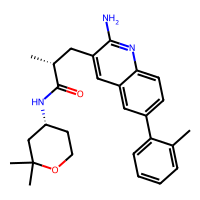
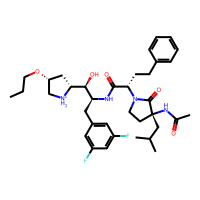
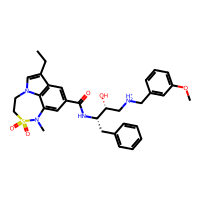
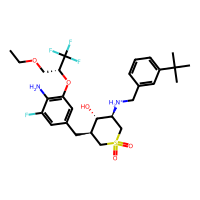
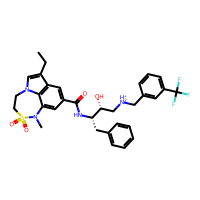

In [20]:
# check if the script is running on google colab
# if so, install rdkit
import sys
#if 'google.colab' in sys.modules:
#    !pip install rdkit

# import relevant packages; make sure the structures are rendered in dataframes
from rdkit.Chem import PandasTools, Descriptors
PandasTools.RenderImagesInAllDataFrames(images=True)

# paste answers and run
PandasTools.AddMoleculeColumnToFrame(bace1_df, smilesCol='mol', molCol='mol_obj')
bace1_df.dropna(axis=0) # drop entries containing empty cells
#display(bace1_df)
bace1_df.head()

1c- Use *rdkit* to calculate the topological polar surface area (TPSA) of the small molecules in the BACE-1 dataframe.

(5 points)

```python
bace1_df["TPSA"] = bace1_df.apply(lambda row: Descriptors._____(row.mol_obj), axis=1)
display(bace1_df)
```

,mol,pIC50,MW,AlogP,HBA,HBD,mol_obj,TPSA
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,9.154901,431.56979,4.4014,3,2,,77.24
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,8.853872,657.81073,2.6412,5,4,,124.58

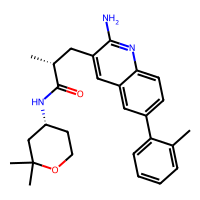
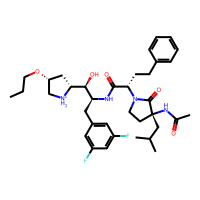

In [ ]:
# paste answers and run

bace1_df["TPSA"] = bace1_df.apply(lambda row: Descriptors.TPSA(row.mol_obj), axis=1)
bace1_df.head(2)
#display(bace1_df)

1d- Create a scatter plot to display the calculated TPSA values against molecular weight.

(5 points)

```python
TPSA = bace1_df[___]
MW = bace1_df[___]

plt.figure(figsize=(6,5)) # use figsize to adjust the figure size
plt.scatter(___, ___, s=12) # s controls the marker size
plt.xlabel("MW")
plt.ylabel("TPSA")
plt.show()
```

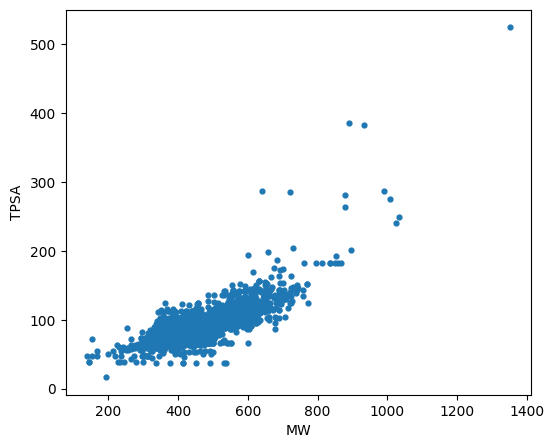

In [34]:
import matplotlib.pyplot as plt

# paste answers and run

TPSA = bace1_df["TPSA"]
MW   = bace1_df["MW"]

plt.figure(figsize=(6,5))
plt.scatter(MW, TPSA, s=12)
plt.xlabel("MW")
plt.ylabel("TPSA")
plt.show()

2- According to the Lipinski's rule of five (RO5), a small molecule can be classified as a drug-like molecule if it has:

- molecular weight <= 500 g/mol
- log P < 5
- 10 or fewer hydrogen-bond acceptors
- 5 or fewer hydrogen-bond donors

Filter the BACE-1 data set based on RO5, and count the number of drug-like molecules.

(20 points)

```python
# use & and/or | to combine multiple filter conditions
bace1_druglike = bace1_df[(bace1_df[___] <= 500) &
                          (____________________) &
                          (____________________) &
                          (____________________)]
print(bace1_druglike.shape[0]) # .shape[0] returns the number of rows (entries)
```

In [40]:
# paste answers and run
bace1_druglike = bace1_df[(bace1_df["MW"] <= 500) &
                          (bace1_df["AlogP"] < 5) &
                          (bace1_df["HBA"] <= 10) &
                          (bace1_df["HBD"] <= 5)]
print("From this data base, according Lipinski's rule, {} are molecules drug-like. ".format(bace1_druglike.shape[0]))


From this data base, according Lipinski's rule, 819 are molecules drug-like. 


3- Several BACE-1 inhibitors were evaluated in clinical trials for the treatment of Alzheimer's disease. For example, verubecestat, elenbecestat, and CNP520. These structures went through extensive optimization, and are not present in the given dataset.

Find the SMILES code of **verubecestat** on Pubchem. Using molecular fingerprints, calculate its Tanimoto similarity to the inhibitors in our BACE-1 data set, and display the top 5 matches.

(30 points)

```python
from rdkit.Chem import MolFromSmiles, rdFingerprintGenerator
from rdkit import DataStructs

morgan_fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=1024)
bace1_df['FP'] = [morgan_fpgen.__________(mol) for mol in bace1_df.mol_obj.tolist()] # use .tolist() to convert a pandas series to list, for iteration purpose

inhibitor_smi = __________ # SMILES of verubecestat
inhibitor_mol = ________(inhibitor_smi) # generate mol object from SMILES
inhibitor_fp = morgan_fpgen.________(inhibitor_mol)

bace1_df['Tanimoto_Similarity'] = [DataStructs.TanimotoSimilarity(___, ___) for fp in bace1_df.FP.tolist()]
bace1_df.loc[:, ['mol','mol_obj','Tanimoto_Similarity']].sort_values(by='Tanimoto_Similarity', ascending=False).head(5)
```

In [ ]:
# paste answers and run

from rdkit.Chem import MolFromSmiles, rdFingerprintGenerator
from rdkit import DataStructs

morgan_fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=1024)
bace1_df['FP'] = [morgan_fpgen[]]

4- Molecular fingerprints and physicochemical descriptors can be used as features in machine learning models. Which kind of information do they provide for a molecule?

(20 points)


**Answers:**

-----------------